Question 2

In [ ]:
import math

In [ ]:
# Total number of people and the number of Apple Music users
total_people = 10
apple_music_users = 6

# Calculate the total number of ways to choose 2 people from 10
total_ways = math.comb(total_people, 2)

# Calculate the number of ways to choose 2 Apple Music users from 6
apple_music_ways = math.comb(apple_music_users, 2)

# Calculate the probability
probability = apple_music_ways / total_ways

In [ ]:
# Print the result with an explanatory statement
print(f"The probability that if you randomly choose two people, both are using Apple Music is {probability:.3f}.")

The probability that if you randomly choose two people, both are using Apple Music is 0.333.


Question 3

In [ ]:
# Probabilities of each team winning
P_sundowns = 0.70
P_chiefs = 0.60
P_pirates = 0.50

# Calculate the probability that none of the teams win
P_sundowns_lose = 1 - P_sundowns
P_chiefs_lose = 1 - P_chiefs
P_pirates_lose = 1 - P_pirates

P_none_wins = P_sundowns_lose * P_chiefs_lose * P_pirates_lose

# Calculate the probability that at least one team wins
P_at_least_one_wins = 1 - P_none_wins

print(f"The probability that at least one team wins their next match is: {P_at_least_one_wins:.2f}")

The probability that at least one team wins their next match is: 0.94


Question 5

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('spotify_songs.csv')

In [5]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
# Check for null or NaN values in each column
print("Null values in each column:")
print(df.isnull().sum())


Null values in each column:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [10]:
# Drop rows with any null values
df_clean = df.dropna()


In [11]:
# Selecting the features and target variable
# Features: numerical columns, excluding text-based columns like 'track_id', 'track_name', etc.
features = ['key', 'loudness', 'mode', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

In [12]:
X = df_clean[features]
y = df_clean['track_popularity']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Standardizing the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Get feature importances
importances = rf.feature_importances_
feature_names = features

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

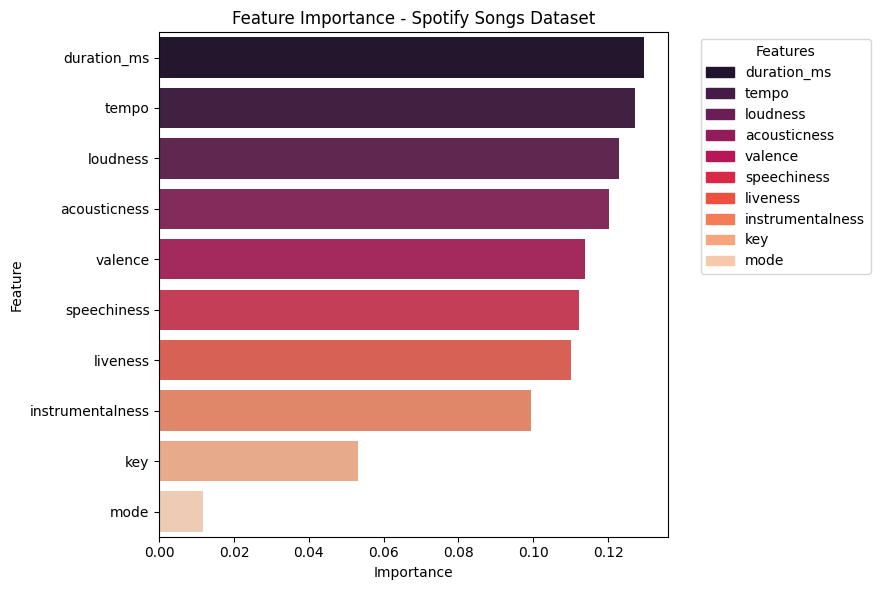

In [17]:
# Create a gradient color palette
gradient = sns.color_palette("rocket", len(feature_importance_df))

# Plot the feature importance with gradient fill and hue
plt.figure(figsize=(9, 6))
barplot = sns.barplot(x='Importance', y='Feature', hue='Feature', palette=gradient, data=feature_importance_df, dodge=False, legend=False)

# Add title
plt.title('Feature Importance - Spotify Songs Dataset')

# Manually create a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=gradient[i]) for i in range(len(feature_importance_df))]
plt.legend(handles, feature_importance_df['Feature'], title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [18]:
# Print feature importance as text
print("Feature Importance - Spotify Songs Dataset")
print("-------------------------------")
for index, row in feature_importance_df.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']:.4f}")

Feature Importance - Spotify Songs Dataset
-------------------------------
Feature: duration_ms, Importance: 0.1296
Feature: tempo, Importance: 0.1272
Feature: loudness, Importance: 0.1229
Feature: acousticness, Importance: 0.1201
Feature: valence, Importance: 0.1138
Feature: speechiness, Importance: 0.1121
Feature: liveness, Importance: 0.1100
Feature: instrumentalness, Importance: 0.0993
Feature: key, Importance: 0.0532
Feature: mode, Importance: 0.0118


Question 7   

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

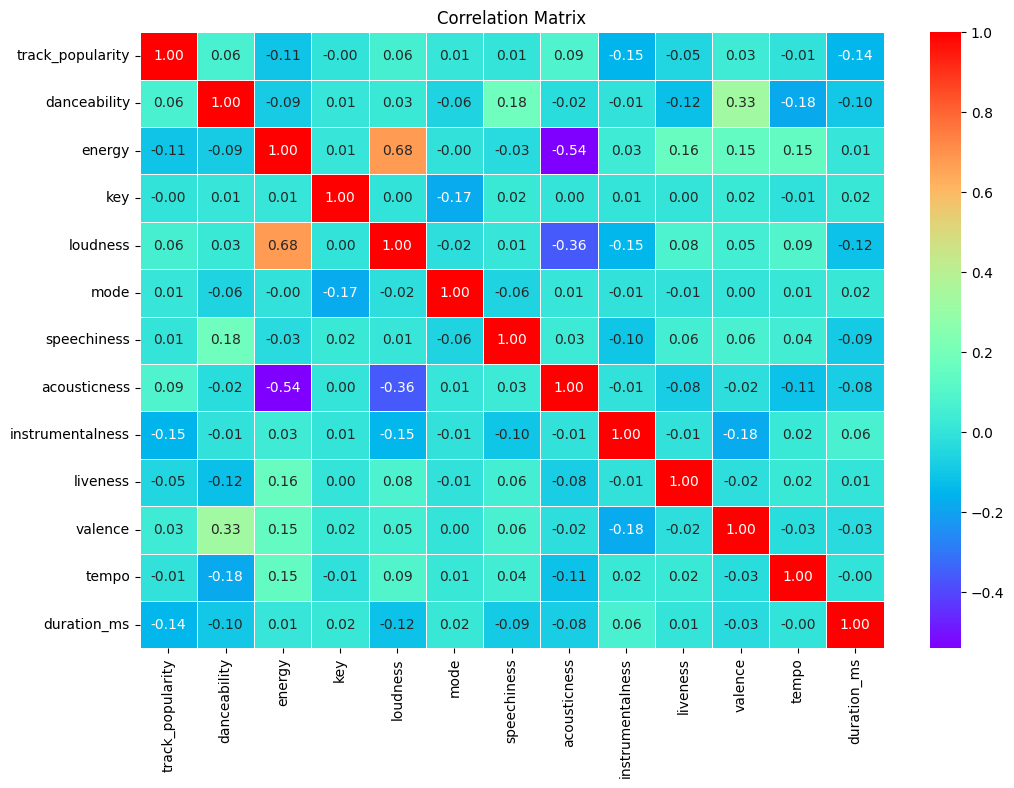

In [20]:
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/DataScience.ipynb

[NbConvertApp] Converting notebook /content/DataScience.ipynb to html
[NbConvertApp] Writing 871051 bytes to /content/DataScience.html
